Unzipping dataset...
Successfully extracted contents to /content/solar_panel_data
Successfully extracted nested zip contents to /content/solar_panel_data/image_data
Loading and preprocessing data...
Loaded 137 images with labels.
Training set shape: (109, 128, 128, 3), (109, 2)
Testing set shape: (28, 128, 128, 3), (28, 2)
Building CNN model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 843ms/step - accuracy: 0.5168 - loss: 0.5178 - val_accuracy: 0.8929 - val_loss: 0.2552
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 781ms/step - accuracy: 0.8690 - loss: 0.2468 - val_accuracy: 1.0000 - val_loss: 0.0566
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0458 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 899ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 4.9971e-05
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 762ms/step - accuracy: 1.0000 - loss: 3.0777e-05 - val_accuracy: 1.0000 - val_loss: 1.8627e-07
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 768ms/step - accuracy: 1.0000 - loss: 2.4862e-07 - val_accuracy: 1.0000 - val_loss: 1.6491e-06
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 800ms/step - accuracy: 1.0000 - loss: 2.9491e-06 - val_accuracy: 1.0000 - val_loss: 1.5872e-05
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 818ms/step - accuracy: 1.0000 - loss

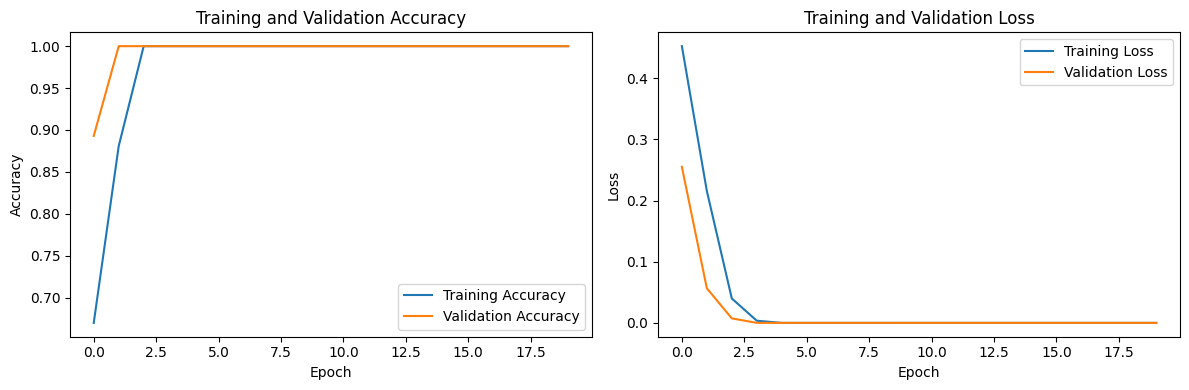

Saving model...
Model saved successfully to /content/saved_model/my_solar_panel_model.keras


In [22]:

import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
num_classes = 2

# 1. Unzip the dataset
print("Unzipping dataset...")
zip_file_path = '/content/Group D - Solar Panel Defect Detection.zip'
extract_dir = '/content/solar_panel_data'
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Successfully extracted contents to {extract_dir}")

# Unzip nested zip file
nested_zip_path = os.path.join(extract_dir, 'Group D - Solar Panel Defect Detection', 'Solar_Panel_Defect_Detection.zip')
nested_extract_dir = os.path.join(extract_dir, 'image_data')
os.makedirs(nested_extract_dir, exist_ok=True)
with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
    zip_ref.extractall(nested_extract_dir)
print(f"Successfully extracted nested zip contents to {nested_extract_dir}")


# 2. Load and preprocess the data
print("Loading and preprocessing data...")
base_dir = os.path.join(nested_extract_dir, 'Solar_Panel_Defect_Detection')
images = []
labels = []

for dataset_name in os.listdir(base_dir):
    dataset_path = os.path.join(base_dir, dataset_name)
    if os.path.isdir(dataset_path):
        images_dir = os.path.join(dataset_path, 'images')
        if os.path.isdir(images_dir):
            for image_name in os.listdir(images_dir):
                image_path = os.path.join(images_dir, image_name)
                img = cv2.imread(image_path)
                if img is not None:
                    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                    img = img / 255.0
                    images.append(img)
                    labels.append(dataset_name)

images = np.array(images)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(labels)
y_train_one_hot = to_categorical(integer_encoded_labels, num_classes=num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, y_train_one_hot, test_size=0.2, random_state=42)

print(f"Loaded {len(images)} images with labels.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# 3. Build the CNN model
print("Building CNN model...")
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid')) # Use sigmoid for binary classification

model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

model.summary()

# 4. Train the model
print("Training model...")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
print("Model training finished.")

# 5. Evaluate the model
print("Evaluating model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print("Model evaluation finished.")

# Plot training history
print("Generating plots...")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Save the model
print("Saving model...")
model_save_dir = '/content/saved_model'
os.makedirs(model_save_dir, exist_ok=True)
model_save_path = os.path.join(model_save_dir, 'my_solar_panel_model.keras')
model.save(model_save_path)
print(f"Model saved successfully to {model_save_path}")